## Import

In [1]:
import pandas as pd # for data handling
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation metrics
import matplotlib.pyplot as plt # for plotting
# use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Get data
Specify the complete path for the zip file containing data. Make sure that the drive is mounted.


In [2]:
! unzip '/content/drive/MyDrive/Colab Notebooks/courses/sklearn_classifiers/homework/hw2.q1.data.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/courses/sklearn_classifiers/homework/hw2.q1.data.zip
  inflating: hw2.q1.new.csv          
  inflating: hw2.q1.test.csv         
  inflating: hw2.q1.train.csv        


In [3]:
# Read data from CSV files into pandas dataframes
train = pd.read_csv('hw2.q1.train.csv') # training data
test = pd.read_csv('hw2.q1.test.csv') # test data
new = pd.read_csv('hw2.q1.new.csv') # unlabeled data
# Show number of rows and columns in each dataframe
print('train contains %d rows and %d columns' %train.shape)
print('test contains %d rows and %d columns' %test.shape)
print('new contains %d rows and %d columns' %new.shape)
print('First 3 rows in train:')
train.head(3) # display first 3 training samples

train contains 10000 rows and 26 columns
test contains 2000 rows and 26 columns
new contains 30 rows and 26 columns
First 3 rows in train:


,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,1.0,0.523,0.303,0.898,0.505,0.264,0.441,0.794,0.868,0.744,...,0.136,0.187,0.452,0.459,0.656,0.126,0.245,0.973,0.917,0.740
1,0.0,0.546,0.782,0.323,0.495,0.970,0.127,0.167,0.359,0.065,...,0.616,0.734,0.935,0.782,0.218,0.223,0.931,0.205,0.487,0.065
2,0.0,0.441,0.260,0.824,0.715,0.071,0.004,0.819,0.063,0.343,...,0.209,0.174,0.542,0.970,0.171,0.459,0.316,0.949,0.871,0.720


## Specify inputs and outputs

In [4]:
features = list(train)[1:] # all but the first column header are feature names
print("features:", features)
X_train, X_test, X_new = train[features], test[features], new[features]
y_train, y_test = train.y, test.y
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_new: {X_new.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

features: ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25']
Shapes:
X_train: (10000, 25), X_test: (2000, 25), X_new: (30, 25)
y_train: (10000,), y_test: (2000,)


## Choose good hyper-parameters for decision tree through cross-validation
We shall vary the maximum number of leaf nodes (rules) in the tree and chose the minimum number of rules that lead to satisfactory classification accuracy.

In [5]:
for k in range(2,10): # number of rules
    model = DecisionTreeClassifier(max_leaf_nodes=k)
    score = cross_val_score(model, X_train, y_train, cv=5).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with {k} rules = {score:0.4f}')

Mean cross-validation accuracy with 2 rules = 0.7178
Mean cross-validation accuracy with 3 rules = 0.8636
Mean cross-validation accuracy with 4 rules = 0.9695
Mean cross-validation accuracy with 5 rules = 0.9695
Mean cross-validation accuracy with 6 rules = 0.9695
Mean cross-validation accuracy with 7 rules = 0.9691
Mean cross-validation accuracy with 8 rules = 0.9690
Mean cross-validation accuracy with 9 rules = 0.9688


## Select a good model
In this case, a tree with fewer than 4 leaf nodes underfits and a tree with more than 4 leaf nodes overfits. So choose *max_leaf_nodes* = 4.

In [6]:
k = 4 # selected value for max_leaf_nodes
chosen_model = DecisionTreeClassifier(max_leaf_nodes=k)
chosen_model

DecisionTreeClassifier(max_leaf_nodes=4)

## Train chosen model

In [7]:
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples

DecisionTreeClassifier(max_leaf_nodes=4)

## Evaluate trained model on test samples

In [8]:
predicted = chosen_model.predict(X_test) # predicted y for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places

Accuracy on test samples = 0.9710
Classification report on test samples:
              precision    recall  f1-score   support

         0.0     0.9679    0.9771    0.9725      1048
         1.0     0.9745    0.9643    0.9694       952

    accuracy                         0.9710      2000
   macro avg     0.9712    0.9707    0.9709      2000
weighted avg     0.9710    0.9710    0.9710      2000



### Confusion matrix

In [9]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
cm.to_csv('cm.csv') # save confusion matrix
cm # display confusion matrix

,0,1
0,1024,24
1,34,918


## Predict output for unlabeled samples

In [10]:
predicted_new = chosen_model.predict(X_new) # predicted classes for unlabeled samples
new_prediction = pd.DataFrame() # dataframe with predicted classes
new_prediction['ID'] = new.ID # identifiers for unlabeled samples
new_prediction['y'] = predicted_new # # predicted classes for unlabeled samples
new_prediction.to_csv('hw2.q1.prediction.csv', index=False) # save as CSV file
new_prediction # display results

,ID,y
0,ID_001,0.0
1,ID_002,0.0
2,ID_003,0.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,0.0
7,ID_008,0.0
8,ID_009,0.0
9,ID_010,0.0


## Extract rules

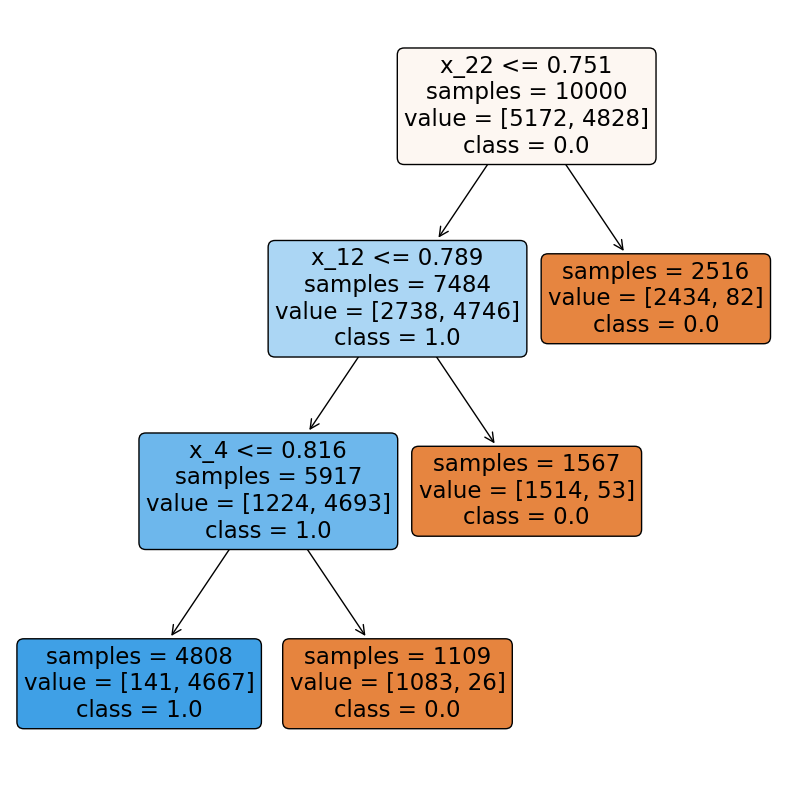

In [11]:
plt.figure(figsize=(10, 10)) # size of figure to be displayed

plot_tree(chosen_model,
          feature_names=features,
          class_names=[f'{c}' for c in chosen_model.classes_],
          filled=True, rounded=True, impurity=False) # plot tree

plt.savefig("hw2.q1.decision_tree.png") # save as PNG file
plt.show() # show tree

You can confirm that only input features *x_4*, *x_12*, and *x_22* are relevant

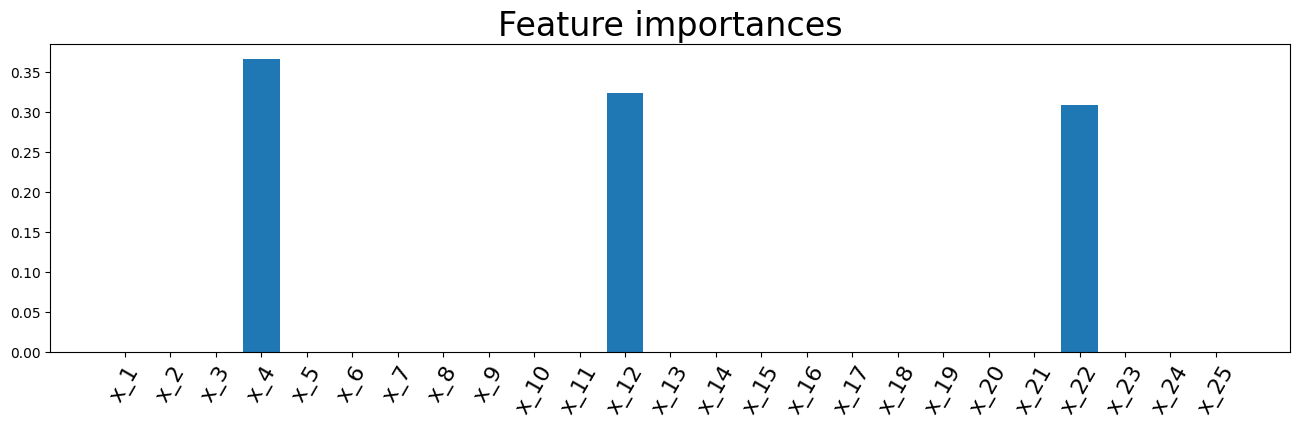

In [12]:
plt.figure(figsize=(16, 4)) # size of figure to be displayed
plt.bar(features, chosen_model.feature_importances_)
plt.xticks(rotation = 60, fontsize=16)
plt.title('Feature importances', fontsize=24)
plt.show()

In [13]:
chosen_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}